In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import pickle
import os
import re

In [ ]:
!unzip /content/books.zip

Archive:  /content/books.zip
  inflating: Books.csv               
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: recsys_taxonomy2.png    


In [ ]:
books=pd.read_csv("/content/Books.csv")
books.head().T

<ipython-input-30-17a8b1657a39>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("/content/Books.csv")


,0,1,2,3,4
ISBN,0195153448,0002005018,0060973129,0374157065,0393045218
Book-Title,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic...,The Mummies of Urumchi
Book-Author,Mark P. O. Morford,Richard Bruce Wright,Carlo D'Este,Gina Bari Kolata,E. J. W. Barber
Year-Of-Publication,2002,2001,1991,1999,1999
Publisher,Oxford University Press,HarperFlamingo Canada,HarperPerennial,Farrar Straus Giroux,W. W. Norton &amp; Company
Image-URL-S,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0393045218.0...
Image-URL-M,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0393045218.0...
Image-URL-L,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books = books.drop(['Image-URL-S', 'Image-URL-M','Image-URL-L'],axis=1)
books.rename(columns={
    "Book-Title": "title",
    "Book-Author": "author",
    "Year-Of-Publication": "year",
    "Publisher": "publisher"
}, inplace=True)
books["title"]=books["title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())

ratings=pd.read_csv("/content/Ratings.csv")
ratings.head().T

In [ ]:
ratings.rename(columns={
    "User-ID": "id",
    "Book-Rating": "rating"
}, inplace=True)

users=pd.read_csv("/content/Users.csv")
users.head().T

,0,1,2,3,4
User-ID,1,2,3,4,5
Location,"nyc, new york, usa","stockton, california, usa","moscow, yukon territory, russia","porto, v.n.gaia, portugal","farnborough, hants, united kingdom"
Age,NaN,18.0,NaN,17.0,NaN


In [ ]:
users.rename(columns={
    "User-ID": "id",
    "Location": "location",
    "Age": "age"
}, inplace=True)

In [ ]:
books.isnull().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
dtype: int64

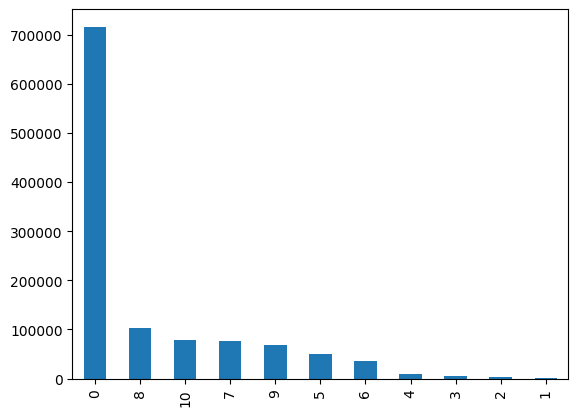

In [ ]:
# To see the rating situation
ratings['rating'].value_counts().plot(kind='bar');

#Drop null values
books.dropna(inplace=True)

In [ ]:
x = ratings['id'].value_counts() > 10
x.sum()
y = x[x].index
ratings = ratings[ratings['id'].isin(y)]
books = ratings.merge(books, on="ISBN")
books.head().T

,0,1,2,3,4
id,276762,29259,35050,98391,134797
ISBN,034544003X,034544003X,034544003X,034544003X,034544003X
rating,0,0,0,9,0
title,Southampton Row Charlotte amp Thomas Pitt Nove...,Southampton Row Charlotte amp Thomas Pitt Nove...,Southampton Row Charlotte amp Thomas Pitt Nove...,Southampton Row Charlotte amp Thomas Pitt Nove...,Southampton Row Charlotte amp Thomas Pitt Nove...
author,Anne Perry,Anne Perry,Anne Perry,Anne Perry,Anne Perry
year,2002,2002,2002,2002,2002
publisher,Ballantine Books,Ballantine Books,Ballantine Books,Ballantine Books,Ballantine Books


In [ ]:
#For the number of rating
popularity = books.groupby('title')['rating'].count().reset_index()
popularity.rename(columns={"rating": "num_of_rating"}, inplace=True)
books = books.merge(popularity, on="title")
books.dropna(inplace=True)

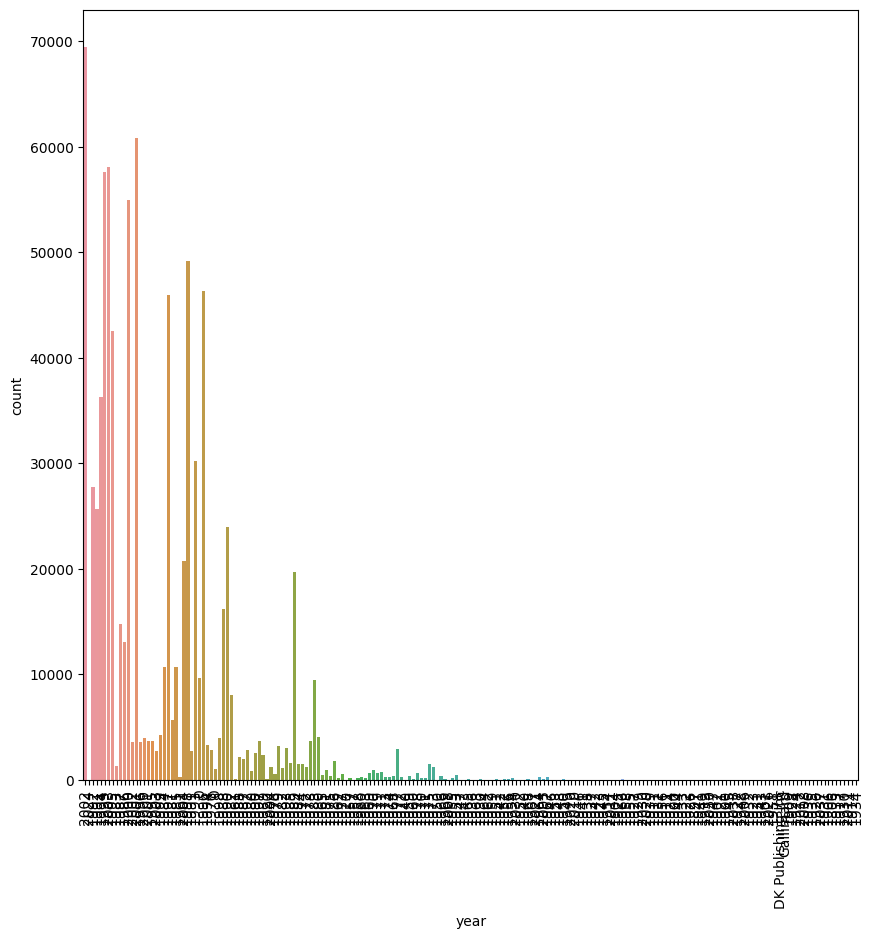

In [ ]:
#Plot yearly book release
plt.figure(figsize=(10,10))
sns.countplot(x=books['year']);
plt.xticks(rotation=90)
plt.show()

In [ ]:
books = books[books['num_of_rating'] >= 10]
books.drop_duplicates(subset=['id', 'title'], inplace=True)
book_pivot = books.pivot_table(columns='id', index='title', values='rating')
book_pivot.isna().sum().sum()
book_pivot.fillna(0, inplace=True)
book_pivot.head(2)

id,8,99,183,242,243,254,383,388,408,424,...,278522,278535,278554,278563,278582,278633,278637,278771,278843,278851
title,,,,,,,,,,,,,,,,,,,,,
01 01 00 The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1 000 Places to See Before You Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compressed Sparse Row (CSR) matrix to store non-zero values efficiently
book_sparse = csr_matrix(book_pivot)
book_sparse

# Creating a nearest neighbors model using the 'brute' algorithm
model = NearestNeighbors(algorithm='brute')

# Fitting the model using the sparse matrix
model.fit(book_sparse)

# Finding 6 nearest neighbors for a specific book
distance, suggestion = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1), n_neighbors=6)

In [ ]:
# Define a function to recommend books based on a book's title
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        for j in books:
            print(j)

In [ ]:
# def popular_books(books,n=100):
#     rating_count=books.groupby("title").count()["rating"].reset_index()
#     rating_count.rename(columns={"rating":"NumberOfVotes"},inplace=True)

#     rating_average=books.groupby("title").count["rating"].mean().reset_index()
#     rating_average.rename(columns={"rating":"AverageRatings"},inplace=True)

#     popularBooks=rating_count.merge(rating_average,on="title")

#     def weighted_rate(x):
#         v=x["NumberOfVotes"]
#         R=x["AverageRatings"]

#         return ((v*R) + (m*C)) / (v+m)

#     C=popularBooks["AverageRatings"].mean()
#     m=popularBooks["NumberOfVotes"].quantile(0.90)

#     popularBooks=popularBooks[popularBooks["NumberOfVotes"] >=250]
#     popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
#     popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)
#     return popularBooks[["Title","NumberOfVotes","AverageRatings","Popularity"]].reset_index(drop=True).head(n)


#     n=10
# top_ten=pd.DataFrame(popular_books(books,10))
# fig,ax=plt.subplots(1,10,figsize=(10,10))
# fig.suptitle("MOST POPULAR 10 BOOKS")
# for i in range(len(top_ten["Title"].tolist())):
#     url=books.loc[books["Title"]==top_ten["Title"].tolist()[i]]
#     ax[i].set_title("RATING: {} ".format(round(books[books["Title"]==top_ten["Title"].tolist()[i]]["Ratings"].mean(),1)))
#     fig.show()

In [ ]:
#book_name = "The Alchemist"

book_name = input("Enter a book name : ")
print(" Suggested Books : ")
recommend_book(book_name)